ver: 20211014.1800

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 实验2.4 离散无记忆信源

## 实验目标

编写一个离散无记忆信源的程序，随机生成任意指定大小的文件，且符合任意指定的字节符号概率分布。

## 理论分析

- 难点：多数计算机语言中，一般只有用来生成常见概率分布（如均匀分布、高斯分布、泊松分布等）随机数的工具，而没有自带生成任意给定概率分布随机数的工具。
- 方法：把均匀分布概率产生出来的随机数，“转换”成符合给定概率分布的数值。

### 思路：蒙特卡罗法
- 设离散无记忆信源为$X$，它每次发出一个字节符号$x$，$q=256$是字节符号的可取值个数, $P(i)$是给定需要满足的字节符号 $x=i$ 的概率。
- 将区间 $[0,1]$ 划分成 $q$ 个子区间，每个消息符号取值 $i$ 对应一个子区间，子区间的大小与概率 $P(i)$ 大小成正比。
- 生成 $[0,1]$ 之间均匀分布的随机数 $f$，它落入的子区间所对应的符号 $i$，就是被“转换”满足给定概率分布的输出符号 $x$。

### 问：有没有合适的数学工具，能够简单有效地实现以上思路中的区间的分割呢？

答：有，$P(i)$ 的累积概率分布函数 $ F(i) = CDF(P(i)) $。我们通过一个简单的例子来观察 $CDF$ 的特性。

P = [0.1 0.3 0.  0.2 0.4]
F = [0.1 0.4 0.4 0.6 1. ]


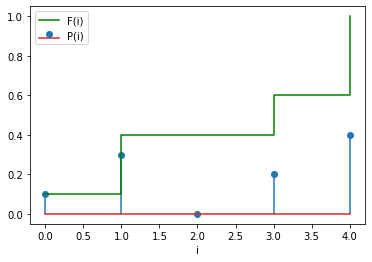

In [2]:
# Make up a probability distribution.
# Notice that we specifically set P[2]=0 to test such special cases.
P = np.array([0.1, 0.3, 0, 0.2, 0.4])
i = np.arange(P.size)

# CDF of P is simple to do with numpy.
F = P.cumsum()

print("P =", P)
print("F =", F)

fig, ax = plt.subplots()
ax.stem(i, P, label='P(i)')
ax.step(i, F, 'g', where='post', label='F(i)')
ax.set_xlabel('i')
ax.legend()

## 算法设计

1. 计算给定概率分布 $P(i)$ 的累积概率分布 $F(i)$
   $$ F(i) = CDF(P(i)) = \sum_{k=0}^{i} P(i), \quad (i = 1,2,...,q) $$
2. 生成 $[0, 1]$ 之间均匀分布的随机实数 $f$
3. 输出符合以下条件的消息符号 $x$, 其中 $i$ 是整数
   $$ 
   x = 
   \begin{cases}
      0, \quad f \leqslant F(0) \\
      i, \quad F(i-1) < f \leqslant F(i), \quad (0 < i \leqslant q)  
   \end{cases}
   $$
4. 循环步骤 2-3，直至输出符号数达到要求


## 算法实现

In [3]:
q = 256
symbol_prob = np.zeros(q)
symbol_prob[0:5] = [0.1, 0.3, 0, 0.2, 0.4]

# Step 1
symbol_cumsum = symbol_prob.cumsum()

print("symbol_prob =", symbol_prob)
print("symbol_cumsum =", symbol_cumsum)

symbol_prob = [0.1 0.3 0.  0.2 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [4]:
msg_len = 102400

# Step 2
symbol_random = np.random.uniform(size=msg_len)

# Step 3
# Q: Explain why the following line can accomplish this step.
msg = np.searchsorted(symbol_cumsum, symbol_random)

print("msg[0:100] =", msg[0:100])

msg[0:100] = [0 3 4 1 4 0 4 4 4 4 4 3 4 3 4 4 4 1 0 3 4 4 4 3 4 0 1 3 1 3 0 4 1 1 1 1 1
 4 1 1 3 1 4 3 4 1 4 3 1 1 1 1 4 3 0 4 4 1 1 1 0 0 4 1 1 4 1 4 4 3 4 1 4 4
 4 4 4 1 3 3 4 3 1 4 1 4 4 4 4 3 1 1 4 4 4 0 3 3 1 4]


## 算法测试

为了测试算法的设计与实现，我们需要统计上面方法所生成出来的序列的概率分布是否符合要求。

我们不另外编写统计概率的函数，而是重用实验《计算文件的信息量》中已经过验证的、高效的概率统计函数。

In [5]:
def probability(x):
    (hist, bin_edges) = np.histogram(x, bins=range(257))
    P = hist/x.size
    return P

In [6]:
print(probability(msg))

[0.09980469 0.30066406 0.         0.19957031 0.39996094 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

上面的概率统计结果与我们设定的比较接近，初步验证了算法的思路和实现是正确的，但仍然需要更多的测试来确认。

我们把上面分散的代码集合成一个方便反复测试调用的函数。

In [7]:
def quick_test(symbol_prob):
    symbol_cumsum = symbol_prob.cumsum()
    print("symbol_prob[0:50] =", symbol_prob[0:50])

    msg_len = 1024000
    symbol_random = np.random.uniform(size=msg_len)
    msg = np.searchsorted(symbol_cumsum, symbol_random)
    print("msg[0:100] =", msg[0:100])

    P = probability(msg)
    print("P relative error =", abs(P - symbol_prob)/symbol_prob)

除了整合代码，我们还对结果的显示进行了一点优化：显示概率分布的相对误差，而不是概率本身。

以防代码整合和优化时出错，我们重复上面的实验来验证该测试函数的正确性。

In [8]:
q = 256
symbol_prob = np.zeros(q)
symbol_prob[0:5] = [0.1, 0.3, 0, 0.2, 0.4]
quick_test(symbol_prob)

symbol_prob[0:50] = [0.1 0.3 0.  0.2 0.4 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
msg[0:100] = [4 1 1 1 3 1 1 4 0 1 4 4 1 1 1 4 4 4 1 1 0 1 4 1 3 1 4 3 1 1 3 4 3 4 4 4 4
 3 4 4 3 4 3 4 3 4 4 1 1 3 4 1 1 4 3 4 1 4 4 3 4 4 4 4 1 0 1 1 4 4 3 1 4 1
 0 4 4 3 1 1 1 1 1 3 4 1 4 3 4 4 3 3 1 4 4 1 1 1 1 1]
P relative error = [0.00424805 0.00168945        nan 0.00533203 0.00033691        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
      

T:\Temp/ipykernel_13004/2337140068.py:11: RuntimeWarning: invalid value encountered in true_divide
  print("P relative error =", abs(P - symbol_prob)/symbol_prob)


重复测试通过。我们下面进行一组新的测试：概率分布设定为均匀分布。

In [9]:
q = 256
symbol_prob = np.zeros(256)
symbol_prob[:] = 1/q
quick_test(symbol_prob)

symbol_prob[0:50] = [0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625]
msg[0:100] = [ 29 193  96  46 250 145 209 189 154 180 110 239 152 149 125 191   8  73
 108  81 238 144 143  85  97  22 218 188  80  18  96  84 158  22 147 247
  17  22  68 103   3 209   8 184   6 174  99  50  48 101  69  97   6 109
 188 105  36 169 175  15 147 129  59  29   5 242 111  88 191 212  62 134
 107  61  28 202 188  71  40 110 153  58  10 235  75 131  74  52 232  50
 108 250  90  58 135 145 234 109  33  77]


概率分布误差相对比较小，我们再进行一组测试：只有一个符号的概率为1，其余为0。

In [10]:
q = 256
symbol_prob = np.zeros(q)
symbol_prob[5] = 1
quick_test(symbol_prob)

symbol_prob[0:50] = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
msg[0:100] = [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
P relative error = [nan nan nan nan nan  0. nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan n

T:\Temp/ipykernel_13004/2337140068.py:11: RuntimeWarning: invalid value encountered in true_divide
  print("P relative error =", abs(P - symbol_prob)/symbol_prob)


结果正常。至此，可以初步认为，算法设计与实现的可信度较高了。

## 完整实现

为了让程序可以被灵活的使用，我们需要增加以下功能，并封装成可独立于开发环境运行的可执行程序：
- 增加I/O功能
    - 可以从CSV文件中读入给定的字节概率分布
    - 将生成的消息序列写入输出文件
- 增加命令行参数解析功能
    - 可指定输入概率分布文件
    - 可指定输出文件等

## 拓展应用

在信息论中，我们最经常使用的是二元离散无记忆信源。那么在不改动上述已经完善的程序的前提下，如何利用这个程序生成给定概率分布的二元离散无记忆信源发出的消息？（提示：二元离散无记忆信源的 $N=8$ 次扩展信源是什么信源？）